In [69]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [70]:
paths = ["prices_round_2_day_-1.csv", "prices_round_2_day_0.csv", "prices_round_2_day_1.csv"]
# initialize df
df = pd.DataFrame()
for i, path in enumerate(paths):
    # concat df
    new_df = pd.read_csv(path, delimiter=";")
    # add 1000000 to timestamp column
    new_df["timestamp"] = new_df["timestamp"] + 1000000 * i
    df = pd.concat([df, new_df])


In [71]:
df.head()


,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,-1
1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,-1
2,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,-1
3,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,-1
4,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,-1


In [72]:
x = df[['SUNLIGHT', 'HUMIDITY']]
y = df['ORCHIDS']


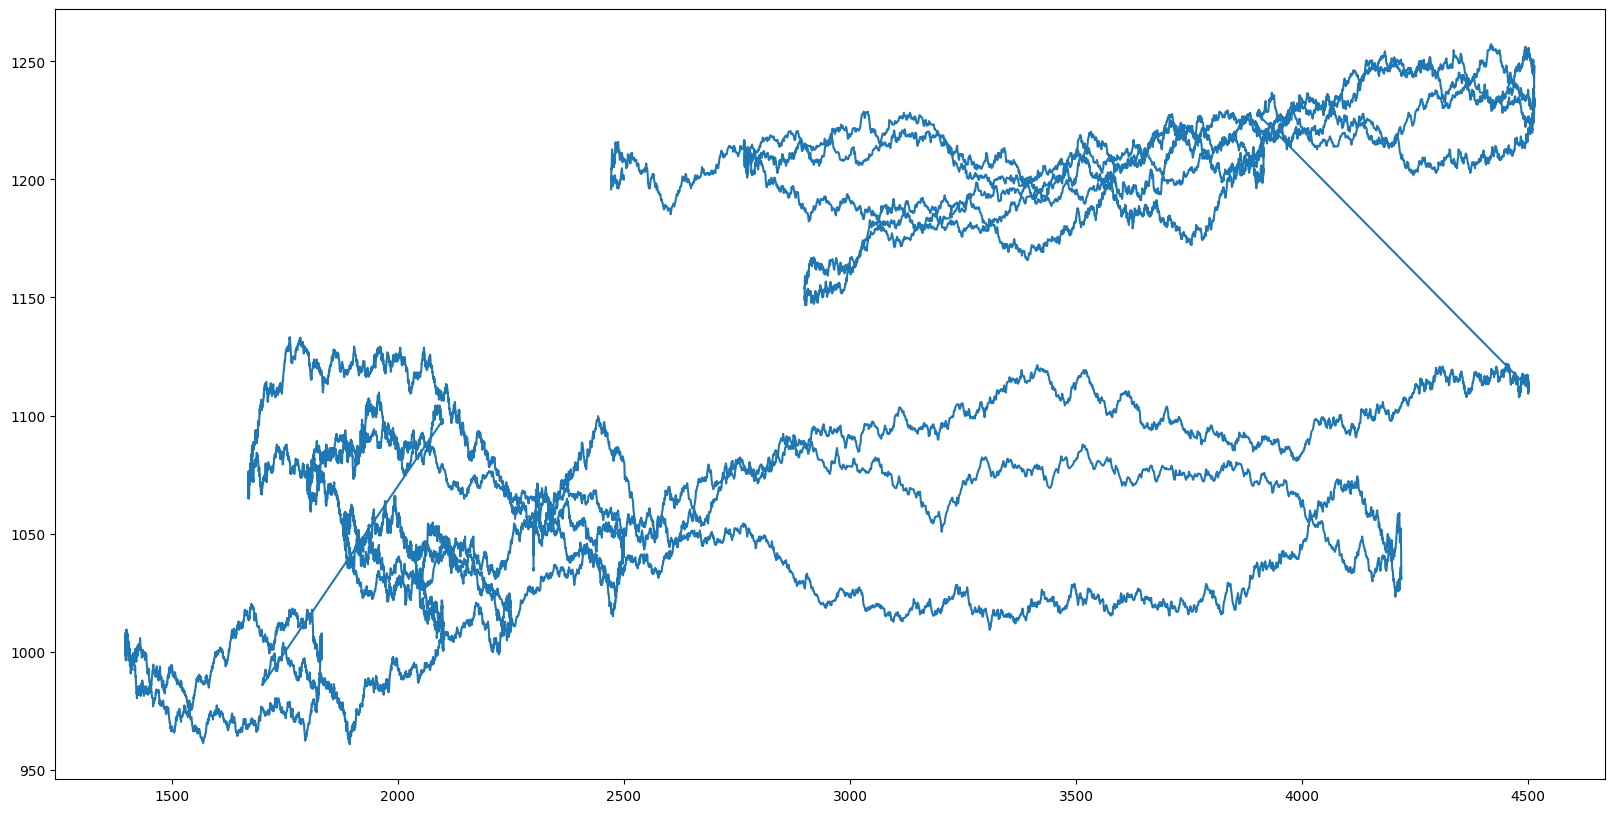

In [73]:
plt.figure(figsize=(20, 10))
plt.plot(df['SUNLIGHT'], y)


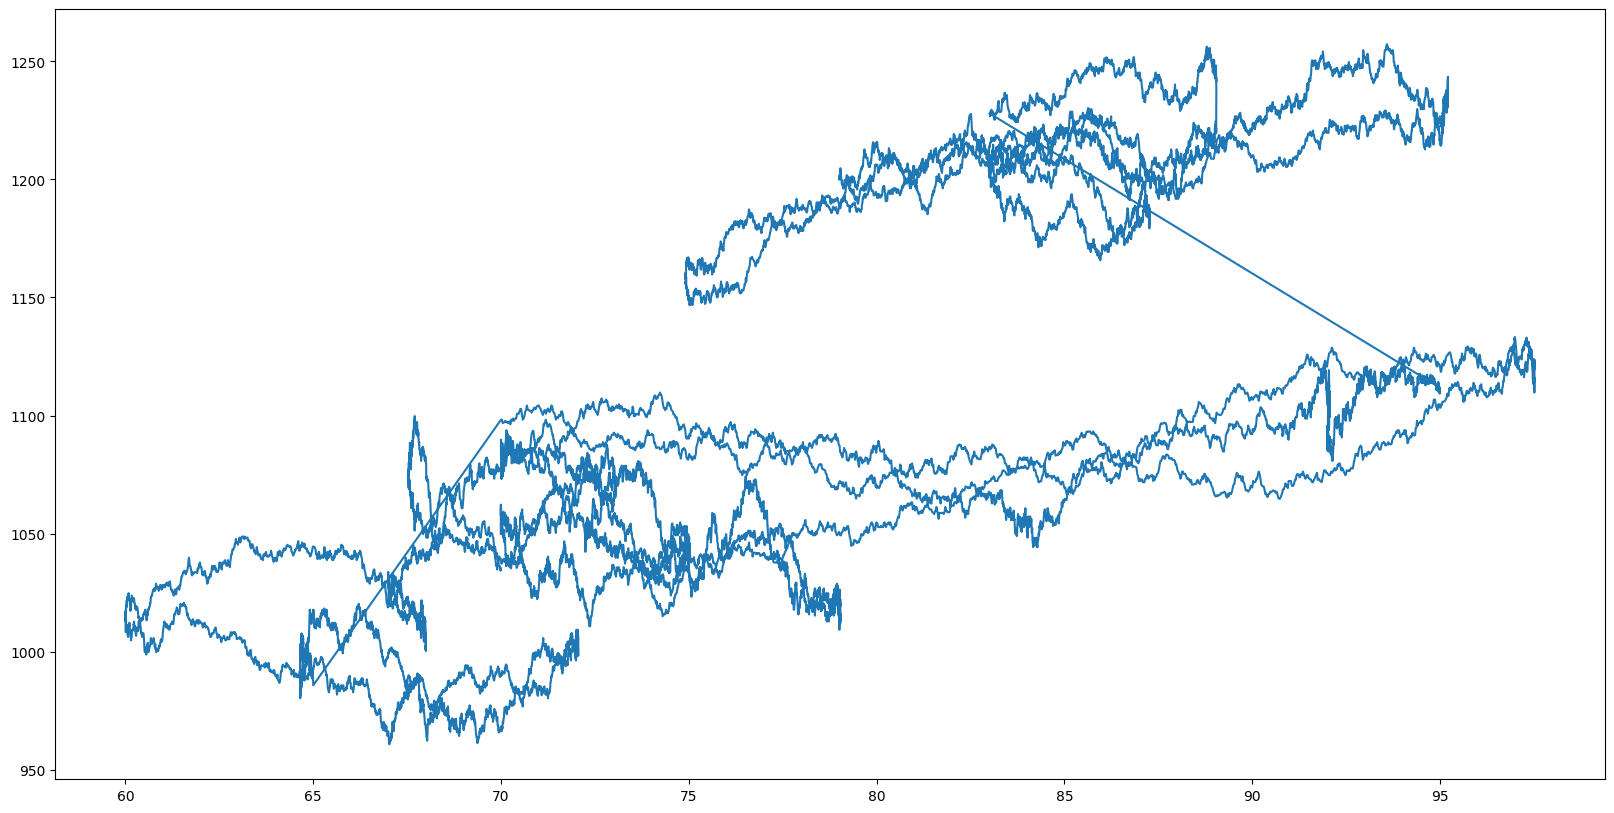

In [74]:
plt.figure(figsize=(20, 10))
plt.plot(df['HUMIDITY'], y)


In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)


In [76]:
reg_model = linear_model.LinearRegression()


In [77]:
reg_model = LinearRegression().fit(x_train, y_train)


In [78]:
print('Intercept: ', reg_model.intercept_)
list(zip(x, reg_model.coef_))


Intercept:  694.1227064726096


[('SUNLIGHT', 0.04019162648689238), ('HUMIDITY', 3.767048760422608)]

In [79]:
y_pred= reg_model.predict(x_test)  
x_pred= reg_model.predict(x_train) 


In [80]:
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff


,Actual value,Predicted value
6102,1214.75,1157.029657
2539,1249.25,1206.922694
1576,1110.25,1124.969287
4896,1021.75,1026.777226
2803,1067.25,1079.028900
...,...,...
1917,1230.25,1231.292061
2219,1123.00,1131.092198
9394,1064.25,1057.532568
865,1200.75,1157.334622
